In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


<ipython-input-4-f8e442db5c06>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ConvertedComp'], hist=False)


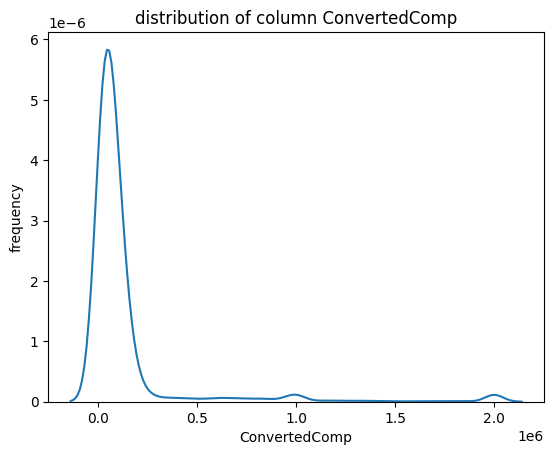

In [4]:
#Determine how the data is distributed

#Plot the distribution curve for the column ConvertedComp.
#plt.figure(figsize=(10,6))
sns.distplot(df['ConvertedComp'], hist=False)
plt.title("distribution of column ConvertedComp")
plt.xlabel('ConvertedComp')
plt.ylabel('frequency')
plt.show()

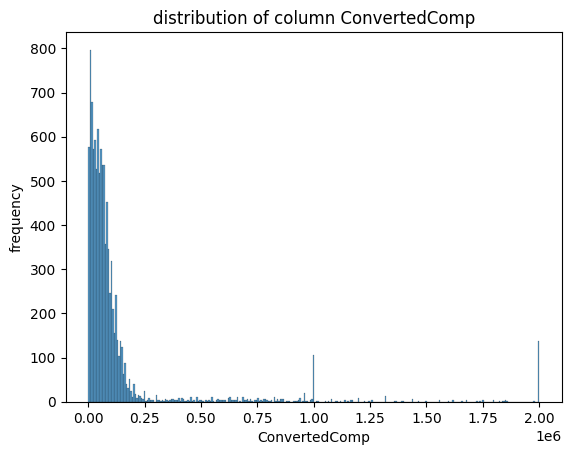

In [5]:
#Plot the histogram for the column ConvertedComp.
#plt.figure(figsize=(10,6))
sns.histplot(df['ConvertedComp'])
plt.title("distribution of column ConvertedComp")
plt.xlabel('ConvertedComp')
plt.ylabel('frequency')
plt.show()

In [6]:
#What is the median of the column ConvertedComp?
print("Median of Col ConvertedComp :",df['ConvertedComp'].median())

Median of Col ConvertedComp : 57745.0


In [7]:
#How many responders identified themselves only as a **Man**?
resp=df['Gender'].value_counts()['Man']
print("No. of responders identified as a Man :",resp)

No. of responders identified as a Man : 10480


In [8]:
#Find out the median ConvertedComp of responders identified themselves only as a Woman?
df_woman=df[df['Gender']=='Woman']
print("Median ConvertedComp of responders as a Woman",df_woman['ConvertedComp'].median())

Median ConvertedComp of responders as a Woman 57708.0


In [9]:
#Give the five number summary for the column Age?
df['Age'].describe()

,Age
count,11111.000000
mean,30.778895
std,7.393686
min,16.000000
25%,25.000000
50%,29.000000
75%,35.000000
max,99.000000


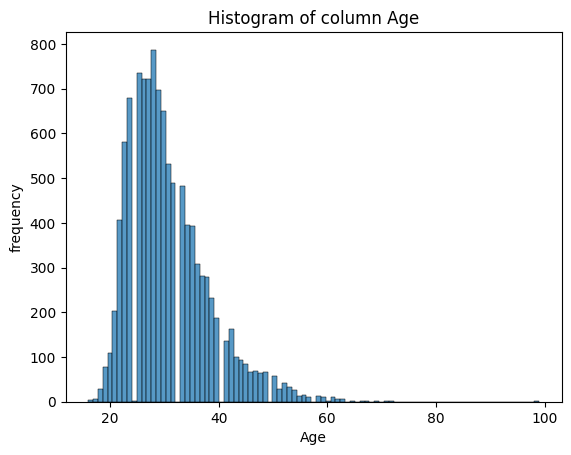

In [10]:
#Plot a histogram of the column Age.
sns.histplot(df['Age'])
plt.title("Histogram of column Age")
plt.xlabel('Age')
plt.ylabel('frequency')
plt.show()

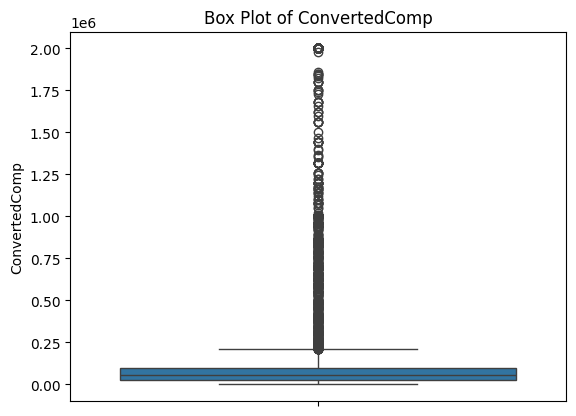

In [14]:
#Finding outliers

#Find out if outliers exist in the column ConvertedComp using a box plot?
sns.boxplot(y=df['ConvertedComp'])
plt.title('Box Plot of ConvertedComp')
plt.show()

In [16]:
#Find out the Inter Quartile Range for the column ConvertedComp.
print(df['ConvertedComp'].describe())
q1 = df['ConvertedComp'].quantile(0.25)
q3 = df['ConvertedComp'].quantile(0.75)
iqr = q3 - q1

print(f"IQR: {iqr}")

count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64
IQR: 73132.0


In [17]:
#Find out the upper and lower bounds.
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

print(f"Upper bound: {upper_bound}")
print(f"Lower bound: {lower_bound}")

Upper bound: 209698.0
Lower bound: -82830.0


In [30]:
#Identify how many outliers are there in the ConvertedComp column.
outliers=df[(df['ConvertedComp']>upper_bound) | (df['ConvertedComp']<lower_bound)]
print("Length of Outliers :", len(outliers))


Length of Outliers : 879


In [33]:
#Create a new dataframe by removing the outliers from the ConvertedComp column.
df_new=df[(df['ConvertedComp']<=upper_bound) & (df['ConvertedComp']>=lower_bound)]
df_new['ConvertedComp'].describe()

,ConvertedComp
count,9703.000000
mean,59883.208389
std,43394.336755
min,0.000000
25%,24060.000000
50%,52704.000000
75%,85574.500000
max,209356.000000


In [42]:
#Find the correlation between Age and all other numerical columns.
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlations = df[numerical_cols].corrwith(df['Age'])

print(correlations)

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
dtype: float64
